In [1]:
import sys
sys.path.append('/Users/Chris/anaconda/envs/tf/lib/python3.6/site-packages')

In [2]:
import keras
import tensorflow
import numpy as np

Using TensorFlow backend.
/Users/Chris/anaconda/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
from keras.datasets import imdb

In [4]:
# download and load data into training and testing sets and labels
(train_data, trains_labels), (test_data, test_labels)\
    = imdb.load_data(num_words=10000)

In [5]:
# restricting to top 10,000 words, so no word index is >9999
max([max(sequence) for sequence in train_data])

9999

In [6]:
# decoder ring for reviews
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

#input review index to translate back to english review text
def decoded_review(index):
    decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[index]])
    return decoded_review

In [7]:
decoded_review(99)

"? steve carpenter cannot make horror movies first of all the casting was very wrong for this movie the only decent part was the hot brown haired girl from buffy the vampire ? this movies has no gore usually a key ? to a horror movie no action no acting and no suspense also a key ? wes ? is a good actor but he is so dry and plain in this that it's sad there were a few parts that were supposed to be funny continuing the teen horror comedy movies and no one laughed in the audience i thought that this movie was rated r and i didn't pay attention and realized it had been changed to pg 13 anyway see this movie if you liked i still know what you did last summer that's the only type of person who would find this movie even remotely scary and seriously this is to you steve carpenter stop making horror movies this movie makes scream look like texas chainsaw massacre"

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
# check newly vectorized sequence
x_train[0]

array([ 0.,  1.,  1., ...,  0.,  0.,  0.])

In [10]:
y_train = np.asarray(trains_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# check 'em out
y_train[0]

1.0

In [11]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [13]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
             loss=losses.binary_crossentropy,
             metrics=[metrics.binary_accuracy])

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 164us/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 134us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3130 - 

In [16]:
history_dict = history.history
history_dict.keys()
acc = history_dict['acc']


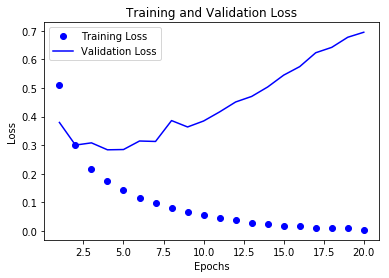

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training Loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

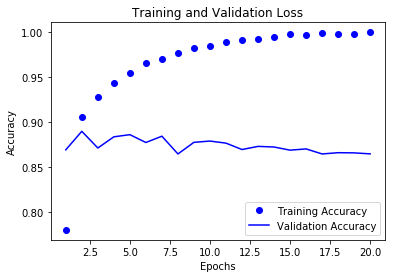

In [18]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [19]:
# reduce number of epochs to reduce overfitting
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.4728 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2666 - acc: 0.9096
Epoch 3/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2031 - acc: 0.9286
Epoch 4/4
25000/25000 [==============================] - 2s 90us/step


Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4580 - acc: 0.8161
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2521 - acc: 0.9101
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1946 - acc: 0.9298
Epoch 4/4
25000/25000 [==============================] - 2s 76us/step


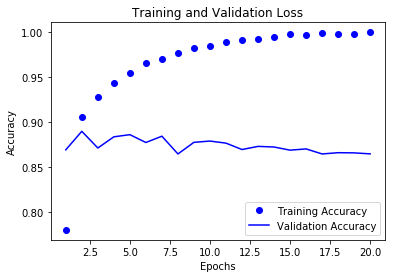

In [21]:
# add hidden layer for comparison
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/4
25000/25000 [==============================] - 3s 105us/step - loss: 0.4535 - acc: 0.8066
Epoch 2/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.2449 - acc: 0.9079
Epoch 3/4
25000/25000 [==============================] - 2s 98us/step - loss: 0.1928 - acc: 0.9269
Epoch 4/4
25000/25000 [==============================] - 3s 101us/step


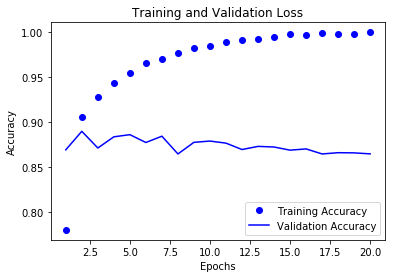

In [22]:
# add units to layers for comparison
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Epoch 1/4
25000/25000 [==============================] - 2s 95us/step - loss: 0.1455 - acc: 0.8258
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.0774 - acc: 0.9124
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.0585 - acc: 0.9310
Epoch 4/4
25000/25000 [==============================] - 2s 82us/step


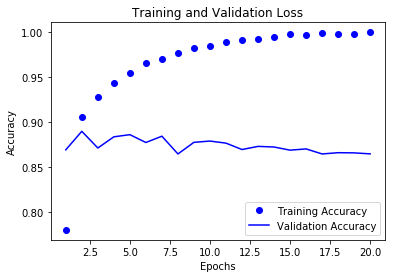

In [23]:
# MSE instead of binary crossentropy
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='mse',
             metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

history_dict = history.history
history_dict.keys()
acc = history_dict['acc']

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()